# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Import Data

In [2]:
load_data_preprocessed_backup=pd.read_csv('loan_data_2007_2014_preprocessed.csv')

/Users/shankar/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (21,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Explore Data

In [3]:
loan_data_preprocessed=load_data_preprocessed_backup.copy()

In [4]:
loan_data_preprocessed['loan_status'].unique

<bound method Series.unique of 0          Fully Paid
1         Charged Off
2          Fully Paid
3          Fully Paid
4             Current
             ...     
466280        Current
466281    Charged Off
466282        Current
466283     Fully Paid
466284        Current
Name: loan_status, Length: 466285, dtype: object>

In [5]:
loan_data_preprocessed.head()

,Unnamed: 0,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,0,0,0,0,0,0,0,1,0,1
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,0,0,0,0,0,0,1,0,0
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,0,0,0,0,0,0,1,0,1
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,0,0,0,0,0,0,0,1,0,1
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,0,0,0,0,0,0,0,1,0,1


In [6]:
loan_data_preprocessed.tail()

,Unnamed: 0,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
466280,466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,...,0,0,0,0,0,0,0,0,1,1
466281,466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,...,0,0,0,0,0,0,0,1,0,0
466282,466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,...,0,0,0,0,0,0,0,1,0,1
466283,466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,...,0,0,0,0,0,0,0,0,1,1
466284,466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,...,0,0,0,0,0,0,0,1,0,1


In [7]:
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]


In [8]:
loan_data_defaults

,Unnamed: 0,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,0,0,0,0,0,0,1,0,0
8,8,8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,...,0,0,0,0,0,0,0,1,0,0
9,9,9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,...,0,0,0,0,0,0,0,1,0,0
12,12,12,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,...,0,1,0,0,0,0,0,1,0,0
14,14,14,1069057,1303503,10000,10000,10000.0,36 months,10.65,325.74,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466254,466254,466254,9856168,11708132,6000,6000,6000.0,60 months,23.40,170.53,...,0,0,0,0,0,0,0,1,0,0
466256,466256,466256,9835883,9309502,15000,15000,15000.0,36 months,16.99,534.72,...,0,0,0,0,0,0,0,1,0,0
466276,466276,466276,9695736,11547808,8525,8525,8525.0,60 months,18.25,217.65,...,0,0,0,0,0,0,0,1,0,0
466277,466277,466277,9007579,10799568,18000,18000,17975.0,36 months,7.90,563.23,...,0,0,0,0,0,0,0,1,0,0


In [9]:
loan_data_defaults.isnull()==True

,Unnamed: 0,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466254,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466256,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466276,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466277,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)
# We fill the missing values with zeroes.

/Users/shankar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [11]:
loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)
# We fill the missing values with zeroes.

# Dependent Variables

In [12]:
loan_data_defaults['recovery rate']=loan_data_defaults['recoveries']/loan_data_defaults['funded_amnt']

<ipython-input-12-ab5fc19e5fc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery rate']=loan_data_defaults['recoveries']/loan_data_defaults['funded_amnt']


In [13]:
loan_data_defaults['recoveries'].head()

1     117.08
8     189.06
9     269.29
12    444.30
14    645.10
Name: recoveries, dtype: float64

In [14]:
loan_data_defaults['recovery rate'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery rate, dtype: float64

In [15]:
loan_data_defaults['recovery rate']=np.where(loan_data_defaults['recovery rate']>1,1,loan_data_defaults['recovery rate'])
loan_data_defaults['recovery rate']=np.where(loan_data_defaults['recovery rate']<0,0,loan_data_defaults['recovery rate'])

<ipython-input-15-57a2f2e9c9ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery rate']=np.where(loan_data_defaults['recovery rate']>1,1,loan_data_defaults['recovery rate'])
<ipython-input-15-57a2f2e9c9ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery rate']=np.where(loan_data_defaults['recovery rate']<0,0,loan_data_defaults['recovery rate'])


In [16]:
loan_data_defaults['recovery rate'].describe()

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: recovery rate, dtype: float64

In [17]:
loan_data_defaults['CCF']=(loan_data_defaults['funded_amnt']-loan_data_defaults['total_rec_prncp'])/loan_data_defaults['funded_amnt']


<ipython-input-17-5853a892ae1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['CCF']=(loan_data_defaults['funded_amnt']-loan_data_defaults['total_rec_prncp'])/loan_data_defaults['funded_amnt']


In [18]:
loan_data_defaults['CCF'].describe()

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

In [19]:
loan_data_defaults.to_csv('loan_data_defaults.csv')

# Explore Dependent Variables

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([2.1023e+04, 1.8370e+03, 3.8730e+03, 1.3940e+03, 2.1330e+03,
        3.3440e+03, 4.7650e+03, 1.7130e+03, 1.1790e+03, 4.0600e+02,
        3.4100e+02, 2.7400e+02, 1.1700e+02, 9.3000e+01, 8.1000e+01,
        7.3000e+01, 5.4000e+01, 7.2000e+01, 5.7000e+01, 3.0000e+01,
        4.7000e+01, 2.7000e+01, 1.7000e+01, 1.5000e+01, 2.0000e+01,
        2.3000e+01, 1.7000e+01, 7.0000e+00, 1.1000e+01, 7.0000e+00,
        8.0000e+00, 7.0000e+00, 7.0000e+00, 8.0000e+00, 7.0000e+00,
        1.0000e+01, 6.0000e+00, 1.1000e+01, 9.0000e+00, 9.0000e+00,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00, 9.0000e+00,
        9.0000e+00, 1.5000e+01, 8.0000e+00, 9.0000e+00, 3.3000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

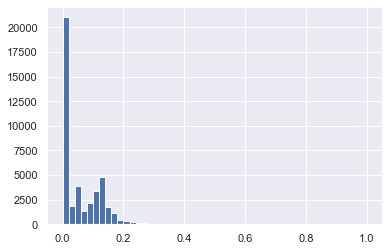

In [21]:
plt.hist(loan_data_defaults['recovery rate'], bins=50)

(array([   3.,   17.,   16.,   44.,   16.,   13.,   71.,   26.,    7.,
          63.,   67.,   17.,   60.,   90.,   23.,   55.,   82.,   42.,
          47.,  123.,   82.,   70.,  122.,   86.,   89.,  110.,  117.,
         111.,  122.,  120.,  135.,  141.,  154.,  146.,  160.,  175.,
         152.,  187.,  202.,  174.,  204.,  208.,  210.,  211.,  241.,
         264.,  281.,  224.,  308.,  267.,  287.,  296.,  340.,  274.,
         365.,  370.,  392.,  364.,  393.,  419.,  411.,  429.,  445.,
         497.,  481.,  478.,  569.,  568.,  599.,  618.,  727.,  691.,
         626.,  805.,  804.,  776.,  881.,  851.,  916.,  934.,  925.,
        1078.,  933., 1218., 1041., 1082., 1336., 1040., 1374., 1073.,
        1406., 1287.,  952., 1414.,  795., 1320.,  578.,  949.,  343.,
         531.]),
 array([4.3800000e-04, 1.0433620e-02, 2.0429240e-02, 3.0424860e-02,
        4.0420480e-02, 5.0416100e-02, 6.0411720e-02, 7.0407340e-02,
        8.0402960e-02, 9.0398580e-02, 1.0039420e-01, 1.1038982e-01

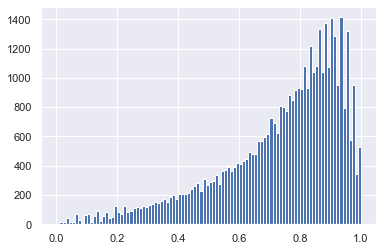

In [22]:
plt.hist(loan_data_defaults['CCF'], bins=100)

In [23]:
loan_data_defaults['recovery_rate_0_1']=np.where(loan_data_defaults['recovery rate']==0,0,1)

<ipython-input-23-453c8a8b40ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate_0_1']=np.where(loan_data_defaults['recovery rate']==0,0,1)


In [24]:
loan_data_defaults['recovery_rate_0_1']

1         1
8         1
9         1
12        1
14        1
         ..
466254    0
466256    0
466276    1
466277    0
466281    0
Name: recovery_rate_0_1, Length: 43236, dtype: int64

# LGD Model

## Spliting Data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
lgd_inputs_stage_1_train,lgd_inputs_stage_1_test,lgd_targets_stage_1_train,lgd_targets_stage_1_test=train_test_split(loan_data_defaults.drop(['good_bad','recovery rate','recovery_rate_0_1','CCF'],axis=1),loan_data_defaults['recovery_rate_0_1'],test_size=0.2,random_state=42)  


In [27]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']
# List of all independent variables for the models.

In [28]:
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']
# List of the dummy variable reference categories. 

In [29]:
lgd_inputs_stage_1_train=lgd_inputs_stage_1_train[features_all]

In [30]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [31]:
lgd_inputs_stage_1_train.isnull().sum()
# Check for missing values. We check whether the value of each row for each column is missing or not,
# then sum accross columns.

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:MORTGAGE                0
home_ownership:NONE                    0
home_ownership:OTHER                   0
home_ownership:OWN                     0
verification_status:Not Verified       0
verification_status:Source Verified    0
purpose:car                            0
purpose:debt_consolidation             0
purpose:educational                    0
purpose:home_improvement               0
purpose:house                          0
purpose:major_purchase                 0
purpose:medical                        0
purpose:moving                         0
purpose:other                          0
purpose:renewable_energy               0
purpose:small_business                 0
purpose:vacation                       0
purpose:wedding 

# Estimating Model

In [32]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [33]:
reg_lgd_st_1=LogisticRegression_with_p_values()
reg_lgd_st_1

In [34]:
reg_lgd_st_1.fit(lgd_inputs_stage_1_train,lgd_targets_stage_1_train)

/Users/shankar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
feature_name=lgd_inputs_stage_1_train.columns.values

In [36]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_1.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-5.649532e-05,NaN
1,grade:A,-6.905343e-06,9.999345e-01
2,grade:B,-5.340879e-05,9.993744e-01
3,grade:C,-1.130434e-04,9.986302e-01
4,grade:D,2.302291e-05,9.997322e-01
5,grade:E,1.500690e-05,9.998418e-01
6,grade:F,6.777348e-05,9.993783e-01
7,home_ownership:MORTGAGE,-3.165165e-05,9.990037e-01
8,home_ownership:NONE,8.258916e-07,9.999992e-01
9,home_ownership:OTHER,7.238605e-07,9.999985e-01


In [37]:
lgd_inputs_stage_1_test=lgd_inputs_stage_1_test[features_all]

In [38]:
lgd_inputs_stage_1_test=lgd_inputs_stage_1_test.drop(features_reference_cat,axis=1)

In [39]:
lgd_inputs_stage_1_test

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,...,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim
178928,0,0,0,1,0,0,1,0,0,0,...,21.69,0.0,3.0,54.0,0.0,10.0,0.0,25.0,0.0,8400.0
69814,1,0,0,0,0,0,0,0,0,0,...,7.75,0.0,0.0,0.0,0.0,5.0,0.0,9.0,0.0,5600.0
101396,0,0,0,0,0,1,0,0,0,0,...,21.99,1.0,0.0,12.0,97.0,9.0,1.0,16.0,0.0,21900.0
463268,1,0,0,0,0,0,0,0,0,0,...,12.45,0.0,0.0,0.0,0.0,12.0,0.0,27.0,0.0,20100.0
253729,0,0,0,1,0,0,0,0,0,1,...,19.51,0.0,2.0,36.0,0.0,20.0,0.0,32.0,0.0,80400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125763,0,1,0,0,0,0,1,0,0,0,...,15.97,1.0,1.0,15.0,0.0,10.0,0.0,21.0,0.0,12000.0
224662,1,0,0,0,0,0,0,0,0,0,...,17.78,0.0,0.0,0.0,0.0,5.0,0.0,15.0,0.0,12800.0
139775,0,0,1,0,0,0,0,0,0,1,...,17.76,0.0,1.0,0.0,111.0,6.0,1.0,10.0,0.0,19200.0
191791,0,0,0,0,1,0,1,0,0,0,...,20.77,0.0,0.0,0.0,0.0,12.0,0.0,29.0,0.0,43000.0


In [40]:
y_hat_lgd_stage_1=reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)

In [41]:
y_hat_test_proba_lgd_stage_1=reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)

In [42]:
y_hat_test_proba_lgd_stage_1

array([[0.3907808 , 0.6092192 ],
       [0.38896641, 0.61103359],
       [0.54506484, 0.45493516],
       ...,
       [0.51929653, 0.48070347],
       [0.4107432 , 0.5892568 ],
       [0.45296866, 0.54703134]])

In [43]:
y_hat_test_proba_lgd_stage_1=y_hat_test_proba_lgd_stage_1[: ][:,1]

In [44]:
y_hat_test_proba_lgd_stage_1

array([0.6092192 , 0.61103359, 0.45493516, ..., 0.48070347, 0.5892568 ,
       0.54703134])

In [45]:
lgd_targets_stage_1_test_temp=lgd_targets_stage_1_test

In [46]:
lgd_targets_stage_1_test_temp.reset_index(drop=True,inplace=True)

In [47]:
df_actual_predicted_probs=pd.concat([lgd_targets_stage_1_test_temp,pd.DataFrame(y_hat_test_proba_lgd_stage_1)],axis=1)

In [48]:
df_actual_predicted_probs.columns=['lgd_targets_stage_1_test','y_hat_test_proba_lgd_stage_1']

In [49]:
df_actual_predicted_probs.index=lgd_targets_stage_1_test.index

In [50]:
df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_test_proba_lgd_stage_1
0,1,0.609219
1,1,0.611034
2,0,0.454935
3,1,0.548350
4,0,0.415357


In [51]:
tr=0.5
df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1']=np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1']>tr,1,0)


In [52]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'],df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'],rownames=['Actual'],colnames=['Predicted'])


Predicted,0,1
Actual,,
0,995,2767
1,687,4199


In [53]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'],df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'],rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]


Predicted,0,1
Actual,,
0,0.115056,0.319958
1,0.079440,0.485546


In [54]:
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]


0.6006012950971323

In [55]:
from sklearn.metrics import roc_curve,roc_auc_score

In [56]:
fpr,tpr,thresholds=roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'],df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])

Text(0.5, 1.0, 'ROC curve')

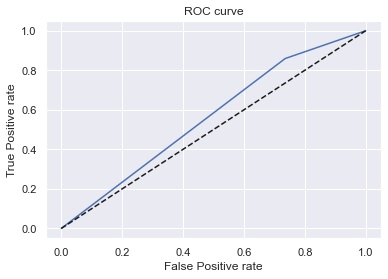

In [57]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')

In [58]:
AUROC=roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'],df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])

In [59]:
AUROC

0.5619405812438537

# Saving the Model

In [60]:
import pickle

In [61]:
pickle.dump(reg_lgd_st_1,open('lgd_model_stage_1.sav','wb'))

# Stage 2 - Linear Regression

In [62]:
lgd_stage_2_data=loan_data_defaults[loan_data_defaults['recovery_rate_0_1']==1]
lgd_stage_2_data.head()

,Unnamed: 0,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad,recovery rate,CCF,recovery_rate_0_1
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,0,0,0,1,0,0,0.046832,0.817416,1
8,8,8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,...,0,0,0,0,1,0,0,0.033761,0.971068,1
9,9,9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,...,0,0,0,0,1,0,0,0.050100,0.874701,1
12,12,12,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,...,0,0,0,0,1,0,0,0.049367,0.860429,1
14,14,14,1069057,1303503,10000,10000,10000.0,36 months,10.65,325.74,...,0,0,0,0,1,0,0,0.064510,0.456653,1


In [63]:
lgd_inputs_stage_2_train,lgd_inputs_stage_2_test,lgd_targets_stage_2_train,lgd_targets_stage_2_test=train_test_split(lgd_stage_2_data.drop(['good_bad','recovery rate','recovery_rate_0_1','CCF'],axis=1),lgd_stage_2_data['recovery rate'],test_size=0.2,random_state=42)


In [64]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [65]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [66]:
lgd_inputs_stage_2_train=lgd_inputs_stage_2_train[features_all]

In [67]:
lgd_inputs_stage_2_train=lgd_inputs_stage_2_train.drop(features_reference_cat,axis=1)

In [68]:
reg_lgd_st_2=LinearRegression()

In [69]:
reg_lgd_st_2.fit(lgd_inputs_stage_2_train,lgd_targets_stage_2_train)

LinearRegression()

In [70]:
reg_lgd_st_2.intercept_

0.2406857742438726

In [71]:
feature_name=lgd_inputs_stage_2_train.columns.values

In [72]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_2.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.406858e-01,NaN
1,grade:A,-6.826892e-02,0.000000e+00
2,grade:B,-5.083556e-02,0.000000e+00
3,grade:C,-3.748066e-02,0.000000e+00
4,grade:D,-2.717310e-02,1.970202e-12
5,grade:E,-1.315941e-02,1.918578e-03
6,grade:F,-5.260168e-03,2.748685e-01
7,home_ownership:MORTGAGE,2.832212e-03,6.050271e-02
8,home_ownership:NONE,1.459035e-01,9.092582e-05
9,home_ownership:OTHER,-9.475922e-03,6.436926e-01


In [73]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.406858e-01,NaN
1,grade:A,-6.826892e-02,0.000000e+00
2,grade:B,-5.083556e-02,0.000000e+00
3,grade:C,-3.748066e-02,0.000000e+00
4,grade:D,-2.717310e-02,1.970202e-12
5,grade:E,-1.315941e-02,1.918578e-03
6,grade:F,-5.260168e-03,2.748685e-01
7,home_ownership:MORTGAGE,2.832212e-03,6.050271e-02
8,home_ownership:NONE,1.459035e-01,9.092582e-05
9,home_ownership:OTHER,-9.475922e-03,6.436926e-01


# Stage 2 - Linear Regression Evaluation

In [74]:
lgd_inputs_stage_2_test=lgd_inputs_stage_2_test[features_all]

In [75]:
lgd_inputs_stage_2_test=lgd_inputs_stage_2_test.drop(features_reference_cat,axis=1)

In [76]:
lgd_inputs_stage_2_test.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [77]:
y_hat_test_lgd_stage_2=reg_lgd_st_2.predict(lgd_inputs_stage_2_test)

In [78]:
lgd_targets_stage_2_temp_test=lgd_targets_stage_2_test

In [79]:
lgd_targets_stage_2_temp_test=lgd_targets_stage_2_temp_test.reset_index(drop=True)

In [80]:
pd.concat([lgd_targets_stage_2_temp_test,pd.DataFrame(y_hat_test_lgd_stage_2)],axis=1).corr()

,recovery rate,0
recovery rate,1.000000,0.307996
0,0.307996,1.000000


/Users/shankar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='recovery rate', ylabel='Density'>

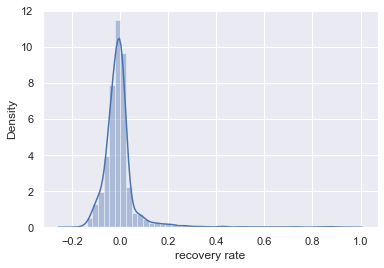

In [81]:
sns.distplot(lgd_targets_stage_2_test-y_hat_test_lgd_stage_2)

In [82]:
pickle.dump(reg_lgd_st_2,open('lgd_model_stage_2.sav','wb'))

# Combining stage 1 and 2

In [83]:
y_hat_test_lgd_stage_2_all=reg_lgd_st_2.predict(lgd_inputs_stage_1_test)

In [84]:
y_hat_test_lgd_stage_2_all

array([0.1193906 , 0.09605635, 0.13367631, ..., 0.12078611, 0.11587422,
       0.15667447])

In [85]:
y_hat_lgd_stage_1

array([1, 1, 0, ..., 0, 1, 1])

In [86]:
y_hat_test_lgd = y_hat_test_proba_lgd_stage_1 * y_hat_test_lgd_stage_2_all

In [87]:
pd.DataFrame(y_hat_test_lgd).describe()


,0
count,8648.000000
mean,0.064079
std,0.013104
min,-0.006824
25%,0.056482
50%,0.064575
75%,0.072788
max,0.141861


In [88]:
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)

In [89]:
pd.DataFrame(y_hat_test_lgd).describe()


,0
count,8648.000000
mean,0.064081
std,0.013095
min,0.000000
25%,0.056482
50%,0.064575
75%,0.072788
max,0.141861


# EAD MODEL 

### Estimation and interpretation

In [90]:
ead_inputs_train,ead_inputs_test,ead_targets_train,ead_targets_test=train_test_split(loan_data_defaults.drop(['good_bad','recovery rate','recovery_rate_0_1','CCF'],axis=1),loan_data_defaults['CCF'],test_size=0.2,random_state=42) 

In [91]:
feature_name=ead_inputs_train.columns.values
feature_name.shape

(208,)

In [92]:
ead_inputs_train=ead_inputs_train[features_all]

In [93]:
ead_inputs_train=ead_inputs_train.drop(features_reference_cat,axis=1)

In [94]:
reg_ead=LinearRegression()
reg_ead.fit(ead_inputs_train,ead_targets_train)

LinearRegression()

In [95]:
reg_ead.coef_.shape

(44,)

In [96]:
feature_name = ead_inputs_train.columns.values

In [97]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_ead.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.109746e+00,NaN
1,grade:A,-3.030033e-01,0.000000e+00
2,grade:B,-2.364277e-01,0.000000e+00
3,grade:C,-1.720232e-01,0.000000e+00
4,grade:D,-1.198470e-01,0.000000e+00
5,grade:E,-6.768713e-02,0.000000e+00
6,grade:F,-2.045907e-02,4.428795e-03
7,home_ownership:MORTGAGE,-6.343341e-03,2.632464e-03
8,home_ownership:NONE,-5.539064e-03,9.318931e-01
9,home_ownership:OTHER,-2.426052e-03,9.335820e-01


## Model validation

In [98]:
ead_inputs_test=ead_inputs_test[features_all]

In [99]:
ead_inputs_test=ead_inputs_test.drop(features_reference_cat,axis=1)

In [100]:
y_hat_test_ead=reg_ead.predict(ead_inputs_test)

In [101]:
ead_targets_test_temp=ead_inputs_test

In [102]:
y_hat_test_ead

array([0.68003415, 0.65759165, 0.86951189, ..., 0.67984665, 0.79684315,
       0.90316038])

In [103]:
ead_targets_test_temp=ead_targets_test_temp.reset_index(drop=True)

In [108]:

pd.concat([ead_targets_test_temp, pd.DataFrame(y_hat_test_ead)], axis = 1).corr()


,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,...,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim,0
grade:A,1.000000,-0.127338,-0.154630,-0.134947,-0.097399,-0.063139,0.043429,-0.002644,-0.004580,-0.000473,...,-0.047096,-0.071940,-0.067623,-0.063409,0.000131,-0.061190,0.024727,-0.013221,0.027708,-0.272544
grade:B,-0.127338,1.000000,-0.325707,-0.284249,-0.205159,-0.132994,0.012822,0.020764,0.005558,-0.003527,...,-0.043894,-0.115401,-0.010718,-0.017404,-0.033873,-0.026407,-0.007085,-0.000838,-0.002755,-0.382032
grade:C,-0.154630,-0.325707,1.000000,-0.345170,-0.249129,-0.161498,-0.010575,-0.006763,0.002063,-0.002824,...,-0.026839,-0.019204,0.001813,0.029818,-0.007521,0.026558,-0.010382,-0.006282,-0.003254,-0.061255
grade:D,-0.134947,-0.284249,-0.345170,1.000000,-0.217418,-0.140941,-0.010628,-0.005902,0.004498,-0.004561,...,0.026750,0.042439,0.036809,0.023849,-0.019159,0.023067,-0.030050,-0.000093,-0.034030,0.127739
grade:E,-0.097399,-0.205159,-0.249129,-0.217418,1.000000,-0.101725,-0.009818,-0.004260,-0.007379,0.003641,...,0.052772,0.070910,0.000407,0.002217,0.033867,0.007460,0.020435,0.006886,0.017590,0.317703
grade:F,-0.063139,-0.132994,-0.161498,-0.140941,-0.101725,1.000000,-0.018716,-0.002762,-0.004784,0.020433,...,0.031329,0.079158,0.012976,-0.010189,0.033936,-0.000218,0.021872,0.014808,0.017741,0.262481
home_ownership:MORTGAGE,0.043429,0.012822,-0.010575,-0.010628,-0.009818,-0.018716,1.000000,-0.009604,-0.016636,-0.277005,...,0.046401,0.069948,0.027888,0.030773,0.154316,0.015705,0.244018,0.018584,0.119784,0.044277
home_ownership:NONE,-0.002644,0.020764,-0.006763,-0.005902,-0.004260,-0.002762,-0.009604,1.000000,-0.000200,-0.003336,...,0.010045,0.016021,0.003220,-0.003862,0.004273,-0.003635,-0.006742,-0.000578,0.004032,-0.012485
home_ownership:OTHER,-0.004580,0.005558,0.002063,0.004498,-0.007379,-0.004784,-0.016636,-0.000200,1.000000,-0.005778,...,0.009442,-0.000691,-0.010223,-0.006691,-0.006402,-0.006296,-0.003652,-0.001002,-0.005763,-0.027973
home_ownership:OWN,-0.000473,-0.003527,-0.002824,-0.004561,0.003641,0.020433,-0.277005,-0.003336,-0.005778,1.000000,...,0.000623,0.003475,0.006149,-0.002139,-0.011868,-0.000885,-0.033276,-0.002061,0.011142,0.016370


/Users/shankar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCF', ylabel='Density'>

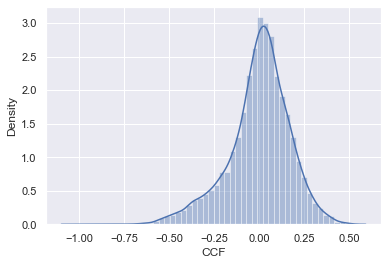

In [107]:
sns.distplot(ead_targets_test - y_hat_test_ead)


In [109]:
pd.DataFrame(y_hat_test_ead).describe()


,0
count,8648.000000
mean,0.736013
std,0.105194
min,0.384774
25%,0.661553
50%,0.731750
75%,0.810625
max,1.161088
